In [2]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

from keras.utils import to_categorical
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.svm import SVC

Using TensorFlow backend.


In [2]:

data = pd.read_csv('SVM_features.csv',index_col = 0)
#data.drop(data.iloc[:, 0:1], inplace = True, axis = 1) 
print(data.head())
#data.to_csv('SVM_features.csv')

         title    A_1    A_2    A_3    A_4    A_5  Y
0  no_act_1(0) -0.986 -0.836 -0.774 -0.759 -0.844  0
1  no_act_1(1) -0.981 -0.829 -0.774 -0.768 -0.828  0
2  no_act_1(2) -0.971 -0.827 -0.777 -0.787 -0.841  0
3  no_act_1(3) -0.965 -0.837 -0.775 -0.768 -0.809  0
4  no_act_1(4) -0.974 -0.829 -0.758 -0.771 -0.832  0


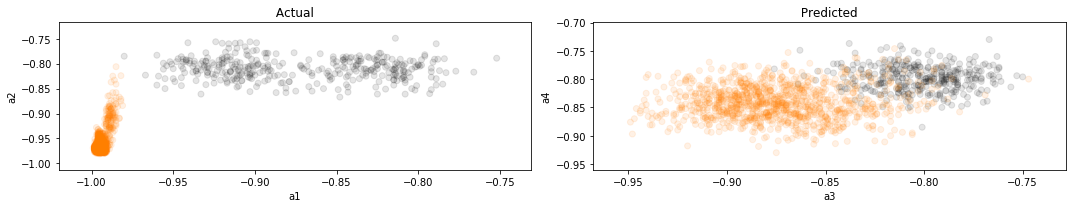

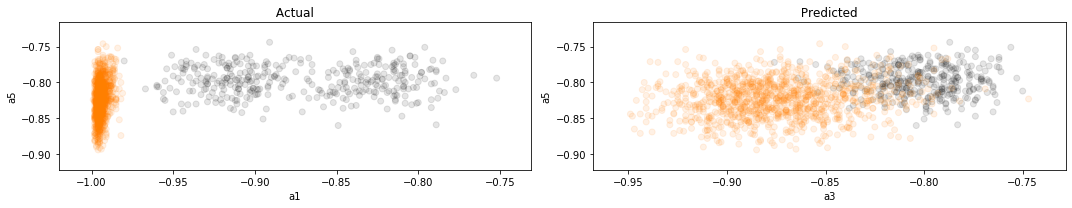

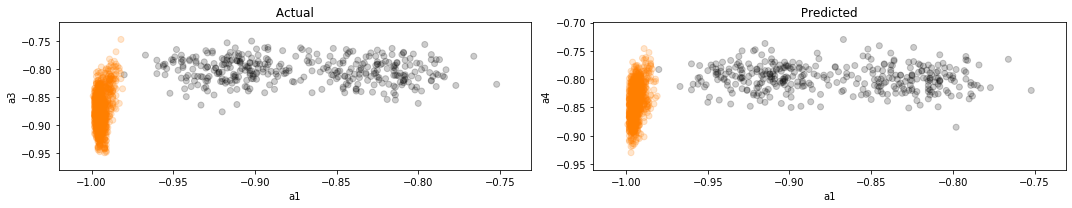

In [134]:
# Analysis !!!

false_set = data[data["Y"] == 0]
true_set = data[data["Y"] == 1]

a1 = data[['A_1']]
a2 = data[['A_2']]

a3 = data[['A_3']]
a4 = data[['A_4']]

a5 = data[['A_5']]

colors = np.array(['#000000', '#ff7f00']) 

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

axes[0].scatter(a1,a2, alpha=0.1, c=colors[(data['Y'] + 1) // 2]) 
axes[0].title.set_text(' Actual ')
axes[0].set_xlabel('a1')
axes[0].set_ylabel('a2')


#axes[0].label('Actual plot')

axes[1].scatter(a3, a4, alpha=0.1, c=colors[(data['Y'] + 1) // 2]) 
axes[1].title.set_text(' Predicted ')
axes[1].set_xlabel('a3')
axes[1].set_ylabel('a4')
fig.tight_layout()


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

axes[0].scatter(a1,a5, alpha=0.1, c=colors[(data['Y'] + 1) // 2]) 
axes[0].title.set_text(' Actual ')
axes[0].set_xlabel('a1')
axes[0].set_ylabel('a5')


#axes[0].label('Actual plot')

axes[1].scatter(a3, a5, alpha=0.1, c=colors[(data['Y'] + 1) // 2]) 
axes[1].title.set_text(' Predicted ')
axes[1].set_xlabel('a3')
axes[1].set_ylabel('a5')
fig.tight_layout()





fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

axes[0].scatter(a1,a3, alpha=0.2, c=colors[(data['Y'] + 1) // 2]) 
axes[0].title.set_text(' Actual ')
axes[0].set_xlabel('a1')
axes[0].set_ylabel('a3')


#axes[0].label('Actual plot')

axes[1].scatter(a1, a4, alpha=0.2, c=colors[(data['Y'] + 1) // 2]) 
axes[1].title.set_text(' Predicted ')
axes[1].set_xlabel('a1')
axes[1].set_ylabel('a4')
fig.tight_layout()

In [278]:
from sklearn import svm
train, test = train_test_split(data, test_size=.3) 
train_normal = train[train['Y']==1] 
train_outliers = train[train['Y']==0] 
outlier_prop = len(train_outliers) / len(train_normal) 
model = svm.OneClassSVM(kernel='rbf', nu=outlier_prop, gamma=0.0001)
print(outlier_prop)

#feature_list = ['A_1','A_2','A_3','A_4','A_5']

feature_list = ['A_3','A_4']

classifier = model.fit(train_normal[feature_list])

0.032720389399675504


In [35]:
def make_model(train,test):
    train_normal = train[(train['Y']==1)] 
    train_outliers = train[(train['Y']==0)] 
    outlier_prop = len(train_outliers) / len(train_normal) 
    model = svm.OneClassSVM(kernel='rbf', nu=outlier_prop, gamma=100)

    feature_list = ['A_3','A_4']
    y_pred = model.predict(test[feature_list]) 
    targs = np.array(test[['Y']])
    targs = np.reshape(targs,(targs.shape[0],))

    preds = y_pred
    p
    print("accuracy: ", metrics.accuracy_score(targs, preds))
    print("precision: ", metrics.precision_score(targs, preds)) 
    
    scores = np.array([metrics.accuracy_score(targs, preds),metrics.precision_score(targs, preds)])
    
    return scores

In [5]:
### k fold implementation ...
feature_list = ['A_2','A_3','A_4','A_5']


#feature_list = ['A_1','A_5']


#############################################################
## k fold validation implementation !!!

num_folds = 5

# Define per-fold score containers
pre_per_fold = []
acc_per_fold = []


# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)
inputs =  np.array(data[feature_list])
targets = np.array(data["Y"])


# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs,targets):
    
    trainX,trainY = inputs[train],targets[train]
    trainY = trainY.reshape(trainX.shape[0],1)
    testX,testY = inputs[test],targets[test]
    testY = testY.reshape(testX.shape[0],1)

    
    set_train = np.concatenate((trainX,trainY),axis=1)
    set_test = np.concatenate((testX,testY),axis=1)

    print('----------------------------------------------------------------------')
    
    print(f'Training for fold {fold_no} ...')
    

    train_normal = set_train[trainY[:,0]==1] 
    train_outliers = set_train[trainY[:,0]==0]
    outlier_prop = len(train_outliers) / len(train_normal) 
    model = svm.OneClassSVM(kernel='rbf', nu=outlier_prop, gamma=100)
    classifier = model.fit(train_normal[:,0:np.shape(feature_list)[0]])
    
    
    y_pred = model.predict(testX) 
    targs = np.array(testY)
    targs = np.reshape(targs,(targs.shape[0],))

    preds = y_pred
    
    for i in range(len(y_pred)):
        if (y_pred[i] == -1):
            y_pred[i] = 0   
            
    #print("accuracy: ", metrics.accuracy_score(targs, preds))
    #print("precision: ", metrics.precision_score(targs, preds)) 
    
    scores = np.array([metrics.accuracy_score(targs, preds),metrics.precision_score(targs, preds)])

    
#####################################################################
#####################################################################
     # Generate a print
    #print(f'Score for fold {fold_no}: acc of {scores[0]}; precision of {scores[1]*100}%')

    pre_per_fold.append(scores[1] * 100)
    acc_per_fold.append(scores[0]*100)
    


  # Increase fold number
    fold_no = fold_no + 1


# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Precison: {pre_per_fold[i]} -  Accuracy : {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Precision: {np.mean(pre_per_fold)}(+- {np.std(pre_per_fold)}')
print('------------------------------------------------------------------------')

    
    
    


----------------------------------------------------------------------
Training for fold 1 ...
----------------------------------------------------------------------
Training for fold 2 ...
----------------------------------------------------------------------
Training for fold 3 ...
----------------------------------------------------------------------
Training for fold 4 ...
----------------------------------------------------------------------
Training for fold 5 ...
------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Precison: 98.83551673944687 -  Accuracy : 95.19010535959688%
------------------------------------------------------------------------
> Fold 2 - Precison: 99.1270611057226 -  Accuracy : 96.1978928080623%
------------------------------------------------------------------------
> Fold 3 - Precison: 98.78167641325535 -  Accuracy : 95.14207149404217%
----

0 --blue-- > noactivity
1 --orange-> activity
accuracy:  0.7301136363636364
precision:  1.0
recall:  0.6421845574387948
f1:  0.7821100917431193
area under curve (auc):  0.8210922787193974
[[173   0]
 [190 341]]


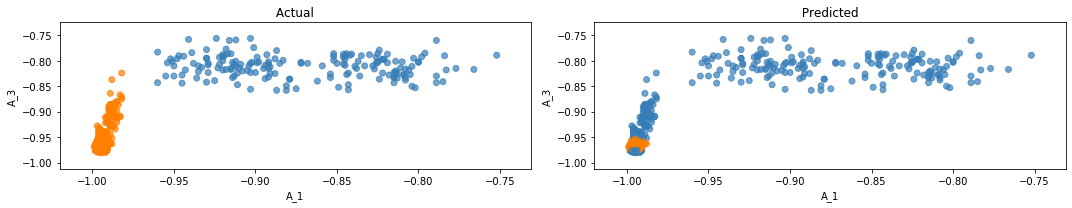

In [148]:

train, test = train_test_split(data, test_size=.5) 
train_normal = train[train['Y']==1] 
train_outliers = train[train['Y']==0] 
outlier_prop = len(train_outliers) / len(train_normal) 
model = svm.OneClassSVM(kernel='rbf', nu=outlier_prop, gamma=1000)

feature_list = ['A_1','A_2']

#feature_list = ['A_1','A_3']
classifier = model.fit(train_normal[feature_list])
# <><><><><><><><><><><><><><><<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

x1 = test[[feature_list[0]]] 
x2 = test[[feature_list[0]]] 
y1 = test[[feature_list[1]]]
y2 = test[[feature_list[1]]]


y_pred = model.predict(test[feature_list]) 

for i in range(len(y_pred)):
  if (y_pred[i] == -1):
    y_pred[i] = 0



print('0 --blue-- > noactivity')
print('1 --orange-> activity')
colors = np.array(['#377eb8', '#ff7f00']) 

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

axes[0].scatter(x1,y1, alpha=0.7, c=colors[(test['Y'] + 1) // 2]) 
axes[0].title.set_text(' Actual ')
axes[0].set_xlabel('A_1')
axes[0].set_ylabel('A_3')


#axes[0].label('Actual plot')

axes[1].scatter(x2, y2, alpha=0.7, c=colors[(y_pred + 1) // 2]) 
axes[1].title.set_text(' Predicted ')
axes[1].set_xlabel('A_1')
axes[1].set_ylabel('A_3')
fig.tight_layout()

#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
from sklearn import metrics

targs = np.array(test[['Y']])
targs = np.reshape(targs,(targs.shape[0],))

preds = y_pred


#print('this is Actual : ',targs)
#print('this is predicted : ',preds)
print("accuracy: ", metrics.accuracy_score(targs, preds))


print("precision: ", metrics.precision_score(targs, preds)) 
print("recall: ", metrics.recall_score(targs, preds))
print("f1: ", metrics.f1_score(targs, preds))
print("area under curve (auc): ", metrics.roc_auc_score(targs, preds))


cm = confusion_matrix(targs, preds)
print(cm)

In [122]:


targs = np.array(test[['Y']])
targs = np.reshape(targs,(targs.shape[0],))

preds = y_pred


print('this is Actual : ',targs)
print('this is predicted : ',preds)
print("accuracy: ", metrics.accuracy_score(targs, preds))


#print("precision: ", metrics.precision_score(targs, preds)) 
print("recall: ", metrics.recall_score(targs, preds))
print("f1: ", metrics.f1_score(targs, preds))
print("area under curve (auc): ", metrics.roc_auc_score(targs, preds))


cm = confusion_matrix(targs, preds)
print(cm)

this is Actual :  [1 1 1 ... 1 1 1]
this is predicted :  [1 1 1 ... 1 1 1]
accuracy:  0.9578561612459917
recall:  0.9747498808956646
f1:  0.9780114722753346
area under curve (auc):  0.7552320833049752


NameError: name 'confusion_matrix' is not defined

In [127]:



#print(np.shape(y_test))
#print(np.shape(preds))



#disp = confusion_matrix(model, test[['VAR']], test[['Y']],normalize='true')

[[  53   38]
 [  71 3112]]


Confusion matrix, without normalization
[[  53   38]
 [  71 3112]]
Normalized confusion matrix
[[0.58 0.42]
 [0.02 0.98]]


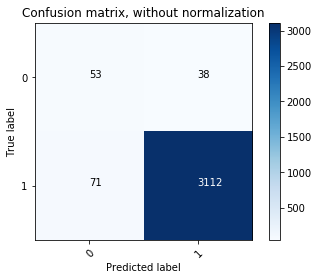

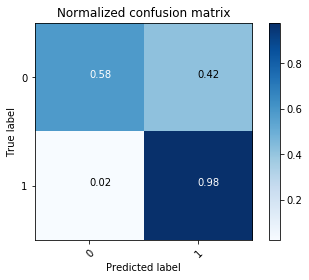

In [128]:
class_names = [0,1]

y_test = targs
y_pred = preds

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=None,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           #xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                  #  ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    #fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


                             BA_1   BA_2    CB_1    CB_2    AC_1   AC_2  Y
title                                                                     
no_act/csi_noactivity_1(0)  8.573  7.377  11.233  10.960  10.291  8.929  0
no_act/csi_noactivity_1(1)  8.386  7.391  11.277  10.772  10.461  8.821  0
no_act/csi_noactivity_1(2)  8.204  7.505  11.738  10.342  10.357  8.933  0
no_act/csi_noactivity_1(3)  8.353  7.492  12.168  10.068  10.217  9.171  0
no_act/csi_noactivity_1(4)  8.108  7.677  12.313   9.853  10.541  8.822  0


"\n\nfig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))\n\naxes[0].scatter(a1,a3, alpha=0.2, c=colors[(data['Y'] + 1) // 2]) \naxes[0].title.set_text(' Actual ')\naxes[0].set_xlabel('a1')\naxes[0].set_ylabel('a3')\n\n\n#axes[0].label('Actual plot')\n\naxes[1].scatter(a1, a4, alpha=0.2, c=colors[(data['Y'] + 1) // 2]) \naxes[1].title.set_text(' Predicted ')\naxes[1].set_xlabel('a1')\naxes[1].set_ylabel('a4')\nfig.tight_layout()\n\n"

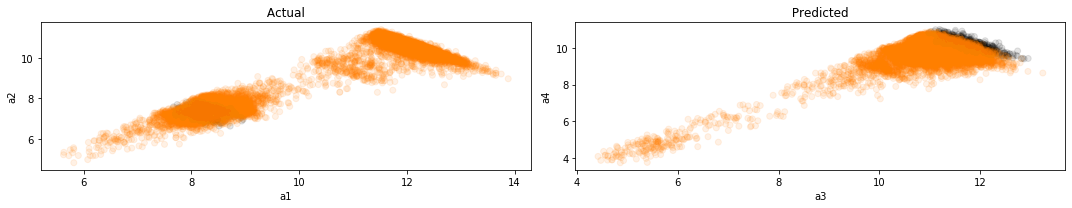

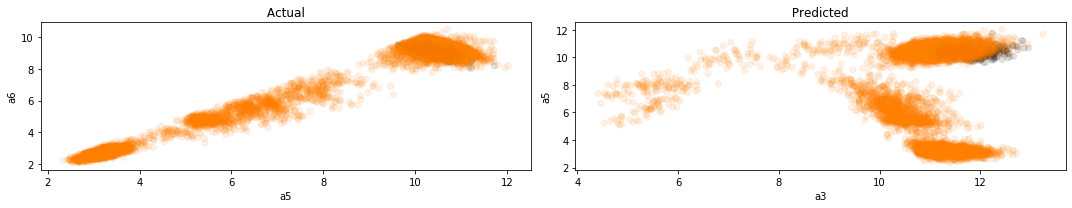

In [10]:
############################################

# aNALYSING THE PHASE ....

#######################################################################

## ANALYSIS FOR PHASE !!!

data = pd.read_csv('Phase_single_room.csv',index_col = 0)

print(data.head())

colors = np.array(['#000000', '#ff7f00']) 



false_set = data[data["Y"] == 0]
true_set = data[data["Y"] == 1]

a1 = data[['BA_1']]
a2 = data[['BA_2']]

a3 = data[['CB_1']]
a4 = data[['CB_2']]

a5 = data[['AC_1']]
a6 = data[['AC_2']]


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

axes[0].scatter(a1,a2, alpha=0.1, c=colors[(data['Y'] + 1) // 2]) 
axes[0].title.set_text(' Actual ')
axes[0].set_xlabel('a1')
axes[0].set_ylabel('a2')


#axes[0].label('Actual plot')

axes[1].scatter(a3, a4, alpha=0.1, c=colors[(data['Y'] + 1) // 2]) 
axes[1].title.set_text(' Predicted ')
axes[1].set_xlabel('a3')
axes[1].set_ylabel('a4')
fig.tight_layout()


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

axes[0].scatter(a5,a6, alpha=0.1, c=colors[(data['Y'] + 1) // 2]) 
axes[0].title.set_text(' Actual ')
axes[0].set_xlabel('a5')
axes[0].set_ylabel('a6')


#axes[0].label('Actual plot')

axes[1].scatter(a3, a5, alpha=0.1, c=colors[(data['Y'] + 1) // 2]) 
axes[1].title.set_text(' Predicted ')
axes[1].set_xlabel('a3')
axes[1].set_ylabel('a5')
fig.tight_layout()


'''

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

axes[0].scatter(a1,a3, alpha=0.2, c=colors[(data['Y'] + 1) // 2]) 
axes[0].title.set_text(' Actual ')
axes[0].set_xlabel('a1')
axes[0].set_ylabel('a3')


#axes[0].label('Actual plot')

axes[1].scatter(a1, a4, alpha=0.2, c=colors[(data['Y'] + 1) // 2]) 
axes[1].title.set_text(' Predicted ')
axes[1].set_xlabel('a1')
axes[1].set_ylabel('a4')
fig.tight_layout()

'''



0 --blue-- > noactivity
1 --orange-> activity
accuracy:  0.9876316994961063
precision:  0.9873890705277908
recall:  1.0
f1:  0.9936545240893068
area under curve (auc):  0.8043478260869565
[[  42   27]
 [   0 2114]]


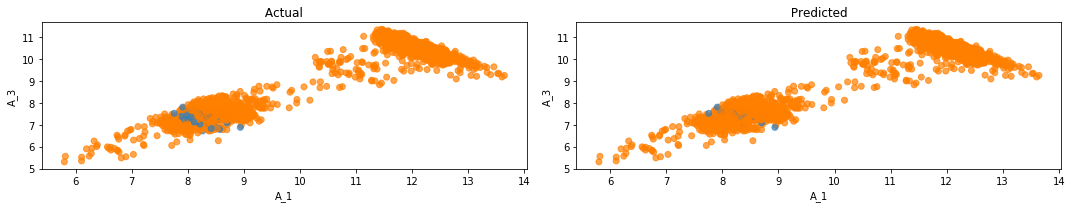

In [16]:
########################################################
'''
This is a single prediction !!!
'''


model = SVC(kernel='rbf')



train, test = train_test_split(data, test_size=.2) 


#train_normal = train[train['Y']==1] 
#train_outliers = train[train['Y']==0] 
#outlier_prop = len(train_outliers) / len(train_normal) 
#model = svm.OneClassSVM(kernel='rbf', nu=outlier_prop, gamma=1000)

model = SVC(kernel='rbf')

a1 = data[['BA_1']]
a2 = data[['BA_2']]

a3 = data[['CB_1']]
a4 = data[['CB_2']]

a5 = data[['AC_1']]
a6 = data[['AC_2']]



feature_list = ['BA_1','BA_2','CB_1','CB_2','AC_1','AC_2']

#feature_list = ['A_1','A_3']
#classifier = model.fit(train_normal[feature_list])


classifier = model.fit(train[feature_list], train['Y'])
# <><><><><><><><><><><><><><><<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

x1 = test[[feature_list[0]]] 
x2 = test[[feature_list[0]]] 
y1 = test[[feature_list[1]]]
y2 = test[[feature_list[1]]]


y_pred = model.predict(test[feature_list]) 

for i in range(len(y_pred)):
  if (y_pred[i] == -1):
    y_pred[i] = 0



print('0 --blue-- > noactivity')
print('1 --orange-> activity')
colors = np.array(['#377eb8', '#ff7f00']) 

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

axes[0].scatter(x1,y1, alpha=0.7, c=colors[(test['Y'] + 1) // 2]) 
axes[0].title.set_text(' Actual ')
axes[0].set_xlabel('A_1')
axes[0].set_ylabel('A_3')


#axes[0].label('Actual plot')

axes[1].scatter(x2, y2, alpha=0.7, c=colors[(y_pred + 1) // 2]) 
axes[1].title.set_text(' Predicted ')
axes[1].set_xlabel('A_1')
axes[1].set_ylabel('A_3')
fig.tight_layout()

#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
from sklearn import metrics

targs = np.array(test[['Y']])
targs = np.reshape(targs,(targs.shape[0],))

preds = y_pred


#print('this is Actual : ',targs)
#print('this is predicted : ',preds)
print("accuracy: ", metrics.accuracy_score(targs, preds))


print("precision: ", metrics.precision_score(targs, preds)) 
print("recall: ", metrics.recall_score(targs, preds))
print("f1: ", metrics.f1_score(targs, preds))
print("area under curve (auc): ", metrics.roc_auc_score(targs, preds))


cm = confusion_matrix(targs, preds)
print(cm)

In [13]:
'''
The cross validation technique !!!!
'''

### k fold implementation ...
#feature_list = ['A_1','A_2','A_3','A_4','A_5']
feature_list = ['BA_1','BA_2','CB_1','CB_2','AC_1','AC_2']

#feature_list = ['BA_1','BA_2']


#############################################################
## k fold validation implementation !!!

num_folds = 5

# Define per-fold score containers
pre_per_fold = []
acc_per_fold = []


# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)
inputs =  np.array(data[feature_list])
targets = np.array(data["Y"])


# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs,targets):
    
    trainX,trainY = inputs[train],targets[train]
    trainY = trainY.reshape(trainX.shape[0],1)
    testX,testY = inputs[test],targets[test]
    testY = testY.reshape(testX.shape[0],1)

    
    set_train = np.concatenate((trainX,trainY),axis=1)
    set_test = np.concatenate((testX,testY),axis=1)

    print('----------------------------------------------------------------------')
    
    print(f'Training for fold {fold_no} ...')
    
    

    

    model = SVC(kernel='rbf')
    classifier = model.fit(trainX,trainY)
    
    
    
    
    
    
    
    y_pred = model.predict(testX) 
    targs = np.array(testY)
    targs = np.reshape(targs,(targs.shape[0],))

    preds = y_pred
    
    for i in range(len(y_pred)):
        if (y_pred[i] == -1):
            y_pred[i] = 0   
            
    #print("accuracy: ", metrics.accuracy_score(targs, preds))
    #print("precision: ", metrics.precision_score(targs, preds)) 
    
    scores = np.array([metrics.accuracy_score(targs, preds),metrics.precision_score(targs, preds)])

    
#####################################################################
#####################################################################
     # Generate a print
    #print(f'Score for fold {fold_no}: acc of {scores[0]}; precision of {scores[1]*100}%')

    pre_per_fold.append(scores[1] * 100)
    acc_per_fold.append(scores[0]*100)
    


  # Increase fold number
    fold_no = fold_no + 1


# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Precison: {pre_per_fold[i]} -  Accuracy : {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Precision: {np.mean(pre_per_fold)}(+- {np.std(pre_per_fold)}')
print('------------------------------------------------------------------------')

    
    
    


----------------------------------------------------------------------
Training for fold 1 ...


/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


----------------------------------------------------------------------
Training for fold 2 ...
----------------------------------------------------------------------
Training for fold 3 ...


/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


----------------------------------------------------------------------
Training for fold 4 ...
----------------------------------------------------------------------
Training for fold 5 ...


/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Precison: 98.68852459016394 -  Accuracy : 98.71736142922583%
------------------------------------------------------------------------
> Fold 2 - Precison: 98.96616541353383 -  Accuracy : 98.9464040311498%
------------------------------------------------------------------------
> Fold 3 - Precison: 98.78220140515222 -  Accuracy : 98.80843263061412%
------------------------------------------------------------------------
> Fold 4 - Precison: 98.87693027608798 -  Accuracy : 98.9000916590284%
------------------------------------------------------------------------
> Fold 5 - Precison: 98.79069767441861 -  Accuracy : 98.80843263061412%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 98.83614447612646 (+- 0.07986453113796549)
> Precision: 98.82090387187131(

In [17]:
### USING BOTH MAGNITUDES AND PHASE !!!

data1 = pd.read_csv('SVM_features.csv')

data101 = pd.DataFrame(data1,columns = ['title','A_1','A_2','A_3','A_4','A_5'])
print(data101.head())

data2 = pd.read_csv('Phase_single_room.csv')
data102 = pd.DataFrame(data2,columns  = ['BA_1','BA_2','CB_1','CB_2','AC_1','AC_2','Y'])
print(data102.head())


data3 = pd.concat([data101,data102],axis = 1)
print(data3.head())
data3.to_csv("Singleroom_dataset_TOTAL.csv")

         title    A_1    A_2    A_3    A_4    A_5
0  no_act_1(0) -0.986 -0.836 -0.774 -0.759 -0.844
1  no_act_1(1) -0.981 -0.829 -0.774 -0.768 -0.828
2  no_act_1(2) -0.971 -0.827 -0.777 -0.787 -0.841
3  no_act_1(3) -0.965 -0.837 -0.775 -0.768 -0.809
4  no_act_1(4) -0.974 -0.829 -0.758 -0.771 -0.832
    BA_1   BA_2    CB_1    CB_2    AC_1   AC_2  Y
0  8.573  7.377  11.233  10.960  10.291  8.929  0
1  8.386  7.391  11.277  10.772  10.461  8.821  0
2  8.204  7.505  11.738  10.342  10.357  8.933  0
3  8.353  7.492  12.168  10.068  10.217  9.171  0
4  8.108  7.677  12.313   9.853  10.541  8.822  0
         title    A_1    A_2    A_3    A_4    A_5   BA_1   BA_2    CB_1  \
0  no_act_1(0) -0.986 -0.836 -0.774 -0.759 -0.844  8.573  7.377  11.233   
1  no_act_1(1) -0.981 -0.829 -0.774 -0.768 -0.828  8.386  7.391  11.277   
2  no_act_1(2) -0.971 -0.827 -0.777 -0.787 -0.841  8.204  7.505  11.738   
3  no_act_1(3) -0.965 -0.837 -0.775 -0.768 -0.809  8.353  7.492  12.168   
4  no_act_1(4) -0.974 -0.

In [9]:
########### ONE CLASS SVM ..

### k fold implementation ...
feature_list = ['A_2','A_3','A_4','A_5']


#feature_list = ['CB_1','CB_2']


#############################################################
## k fold validation implementation !!!

num_folds = 5

# Define per-fold score containers
pre_per_fold = []
acc_per_fold = []


# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)
inputs =  np.array(data[feature_list])
targets = np.array(data["Y"])


# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs,targets):
    
    trainX,trainY = inputs[train],targets[train]
    trainY = trainY.reshape(trainX.shape[0],1)
    testX,testY = inputs[test],targets[test]
    testY = testY.reshape(testX.shape[0],1)

    
    set_train = np.concatenate((trainX,trainY),axis=1)
    set_test = np.concatenate((testX,testY),axis=1)

    print('----------------------------------------------------------------------')
    
    print(f'Training for fold {fold_no} ...')
    

    train_normal = set_train[trainY[:,0]==1] 
    train_outliers = set_train[trainY[:,0]==0]
    outlier_prop = len(train_outliers) / len(train_normal) 
    model = svm.OneClassSVM(kernel='rbf', nu=outlier_prop, gamma=100)
    classifier = model.fit(train_normal[:,0:np.shape(feature_list)[0]])
    
    
    y_pred = model.predict(testX) 
    targs = np.array(testY)
    targs = np.reshape(targs,(targs.shape[0],))

    preds = y_pred
    
    for i in range(len(y_pred)):
        if (y_pred[i] == -1):
            y_pred[i] = 0   
            
    #print("accuracy: ", metrics.accuracy_score(targs, preds))
    #print("precision: ", metrics.precision_score(targs, preds)) 
    
    scores = np.array([metrics.accuracy_score(targs, preds),metrics.precision_score(targs, preds)])

    
#####################################################################
#####################################################################
     # Generate a print
    #print(f'Score for fold {fold_no}: acc of {scores[0]}; precision of {scores[1]*100}%')

    pre_per_fold.append(scores[1] * 100)
    acc_per_fold.append(scores[0]*100)
    


  # Increase fold number
    fold_no = fold_no + 1


# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Precison: {pre_per_fold[i]} -  Accuracy : {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Precision: {np.mean(pre_per_fold)}(+- {np.std(pre_per_fold)}')
print('------------------------------------------------------------------------')

    
    
    


----------------------------------------------------------------------
Training for fold 1 ...
----------------------------------------------------------------------
Training for fold 2 ...
----------------------------------------------------------------------
Training for fold 3 ...
----------------------------------------------------------------------
Training for fold 4 ...
----------------------------------------------------------------------
Training for fold 5 ...
------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Precison: 98.88457807953444 -  Accuracy : 95.73980760421439%
------------------------------------------------------------------------
> Fold 2 - Precison: 98.7378640776699 -  Accuracy : 95.32753092075126%
------------------------------------------------------------------------
> Fold 3 - Precison: 99.12748424624334 -  Accuracy : 96.1044912923923%
----

In [64]:
### ANALYSING ALL :
data = pd.read_csv('1bhk_folder/1BHK_dataset_TOTAL.csv')

#print(data.head())

colors = np.array(['#000000', '#ff7f00']) 




'''
The cross validation technique !!!!
'''
predictions = []


### k fold implementation ...
all_feat = ['A_1','A_2','A_3','A_4','A_5','BA_1','BA_2','CB_1','CB_2','AC_1','AC_2']

amplitude = ['A_1','A_2','A_3','A_4','A_5']


phase = ['BA_1','BA_2','CB_1','CB_2','AC_1','AC_2']

features = [all_feat,amplitude,phase]

for feature_list in features:
    print(feature_list)
    #############################################################
    ## k fold validation implementation !!!

    num_folds = 5

    # Define per-fold score containers
    pre_per_fold = []
    acc_per_fold = []


    # Define the K-fold Cross Validator
    kfold = KFold(n_splits=num_folds, shuffle=True)
    inputs =  np.array(data[feature_list])
    targets = np.array(data["Y"])


    # K-fold Cross Validation model evaluation
    fold_no = 1
    for train, test in kfold.split(inputs,targets):

        trainX,trainY = inputs[train],targets[train]
        trainY = trainY.reshape(trainX.shape[0],1)
        testX,testY = inputs[test],targets[test]
        testY = testY.reshape(testX.shape[0],1)


        set_train = np.concatenate((trainX,trainY),axis=1)
        set_test = np.concatenate((testX,testY),axis=1)
        '''
        print('----------------------------------------------------------------------')

        print(f'Training for fold {fold_no} ...')
        '''
        model = SVC(kernel='rbf')
        classifier = model.fit(trainX,trainY)

        y_pred = model.predict(testX) 
        targs = np.array(testY)
        targs = np.reshape(targs,(targs.shape[0],))

        preds = y_pred

        for i in range(len(y_pred)):
            if (y_pred[i] == -1):
                y_pred[i] = 0   
        predictions.append(y_pred)

        #print("accuracy: ", metrics.accuracy_score(targs, preds))
        #print("precision: ", metrics.precision_score(targs, preds)) 

        scores = np.array([metrics.accuracy_score(targs, preds),metrics.precision_score(targs, preds)])


    #####################################################################
    #####################################################################
         # Generate a print
        #print(f'Score for fold {fold_no}: acc of {scores[0]}; precision of {scores[1]*100}%')

        pre_per_fold.append(scores[1] * 100)
        acc_per_fold.append(scores[0]*100)



      # Increase fold number
        fold_no = fold_no + 1


    # == Provide average scores ==
    print('------------------------------------------------------------------------')
    print('Score per fold')
    '''
    for i in range(0, len(acc_per_fold)):
      print('------------------------------------------------------------------------')
      print(f'> Fold {i+1} - Precison: {pre_per_fold[i]} -  Accuracy : {acc_per_fold[i]}%')
    print('------------------------------------------------------------------------')
    '''

    print('Average scores for all folds:')
    print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
    print(f'> Precision: {np.mean(pre_per_fold)}(+- {np.std(pre_per_fold)}')
    print('------------------------------------------------------------------------')






['A_1', 'A_2', 'A_3', 'A_4', 'A_5', 'BA_1', 'BA_2', 'CB_1', 'CB_2', 'AC_1', 'AC_2']
------------------------------------------------------------------------
Score per fold
Average scores for all folds:
> Accuracy: 86.43648570202672 (+- 2.400319657382098)
> Precision: 87.63819236998391(+- 2.767530275725024
------------------------------------------------------------------------
['A_1', 'A_2', 'A_3', 'A_4', 'A_5']
------------------------------------------------------------------------
Score per fold
Average scores for all folds:
> Accuracy: 100.0 (+- 0.0)
> Precision: 100.0(+- 0.0
------------------------------------------------------------------------
['BA_1', 'BA_2', 'CB_1', 'CB_2', 'AC_1', 'AC_2']


/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

------------------------------------------------------------------------
Score per fold
Average scores for all folds:
> Accuracy: 85.44105398652229 (+- 0.9135437343053383)
> Precision: 89.8746632843851(+- 0.4538947674117676
------------------------------------------------------------------------


/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [67]:
print(predictions[2])

[0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1
 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1]


In [5]:
### ANALYSING ALL : for overfitting checking on train data

data = pd.read_csv('2bhk_folder/2_BHK_20Aug_dataset.csv')

#print(data.head())

'''
The cross validation technique !!!!
'''

### k fold implementation ...
all_feat = ['A_2','A_3','A_4','A_5','BA_1','BA_2','CB_1','CB_2','AC_1','AC_2']

amplitude = ['A_2','A_3','A_4','A_5']


phase = ['BA_1','BA_2','CB_1','CB_2','AC_1','AC_2']

features = [all_feat,amplitude,phase]

for feature_list in features:
    print(feature_list)
    #############################################################
    ## k fold validation implementation !!!

    num_folds = 5

    # Define per-fold score containers
    pre_per_fold = []
    acc_per_fold = []


    # Define the K-fold Cross Validator
    kfold = KFold(n_splits=num_folds, shuffle=True)
    inputs =  np.array(data[feature_list])
    targets = np.array(data["Y"])


    # K-fold Cross Validation model evaluation
    fold_no = 1
    for train, test in kfold.split(inputs,targets):

        trainX,trainY = inputs[train],targets[train]
        trainY = trainY.reshape(trainX.shape[0],1)
        testX,testY = inputs[test],targets[test]
        testY = testY.reshape(testX.shape[0],1)


        set_train = np.concatenate((trainX,trainY),axis=1)
        set_test = np.concatenate((testX,testY),axis=1)
        '''
        print('----------------------------------------------------------------------')

        print(f'Training for fold {fold_no} ...')
        '''
        model = SVC(kernel='rbf')
        classifier = model.fit(trainX,trainY)

        y_pred = model.predict(testX) 
        targs = np.array(testY)
        targs = np.reshape(targs,(targs.shape[0],))

        preds = y_pred

        for i in range(len(y_pred)):
            if (y_pred[i] == -1):
                y_pred[i] = 0   

        scores = np.array([metrics.accuracy_score(targs, preds),metrics.precision_score(targs, preds)])


    #####################################################################
    #####################################################################
         # Generate a print
        #print(f'Score for fold {fold_no}: acc of {scores[0]}; precision of {scores[1]*100}%')

        pre_per_fold.append(scores[1] * 100)
        acc_per_fold.append(scores[0]*100)



      # Increase fold number
        fold_no = fold_no + 1


    # == Provide average scores ==
    print('------------------------------------------------------------------------')
    print('Score per fold')
    '''
    for i in range(0, len(acc_per_fold)):
      print('------------------------------------------------------------------------')
      print(f'> Fold {i+1} - Precison: {pre_per_fold[i]} -  Accuracy : {acc_per_fold[i]}%')
    print('------------------------------------------------------------------------')
    '''

    print('Average scores for all folds:')
    print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
    print(f'> Precision: {np.mean(pre_per_fold)}(+- {np.std(pre_per_fold)}')
    print('------------------------------------------------------------------------')






['A_2', 'A_3', 'A_4', 'A_5', 'BA_1', 'BA_2', 'CB_1', 'CB_2', 'AC_1', 'AC_2']


/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

------------------------------------------------------------------------
Score per fold
Average scores for all folds:
> Accuracy: 94.09666053692547 (+- 0.8248276528342265)
> Precision: 99.15061140593056(+- 0.29496404384509184
------------------------------------------------------------------------
['A_2', 'A_3', 'A_4', 'A_5']


/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

------------------------------------------------------------------------
Score per fold
Average scores for all folds:
> Accuracy: 71.68657586676036 (+- 1.7086056723677918)
> Precision: 78.51535491725905(+- 1.7212962447726885
------------------------------------------------------------------------
['BA_1', 'BA_2', 'CB_1', 'CB_2', 'AC_1', 'AC_2']


/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

------------------------------------------------------------------------
Score per fold
Average scores for all folds:
> Accuracy: 94.22334185516866 (+- 0.7776537165729869)
> Precision: 99.6463271748434(+- 0.22432699097349498
------------------------------------------------------------------------


In [152]:
print(np.shape(predictions))

#print(np.array(testY))

target = np.array(testY)
temp1 = predictions[1]
temp2 = predictions[2]

temp3 = np.zeros(len(target))

for i in range(len(temp1)):
    if(temp1[i] + temp2[i] >= 1):
        temp3[i] = 1
    else:
        temp3[i] = 0


print(metrics.accuracy_score(temp3,target))

(3, 423)
0.8983451536643026
